In [35]:
%pip install pyagrum
%load_ext autoreload
%autoreload 2
%pip install pandas


import csv
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import re
import itertools
from model import *
from variables import *
from btg_generator import *
import re

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config

## Test import

In [7]:
# bn=gum.loadID("btg.bifxml")
gu = GumUtils()
gu = btg_generate()
print(IS_SIMPLIFIED)
print(DEBUG)
gnb.showBN(gu.diag, size=40)
gnb.showCPTs(gu.diag)

def cpt(gu, names):
    for var_name in names: 
        if not gu.has_parents(var_name):
            p("root node skip {}".format(var_name))
        # print(gu.diag.cpt(var_name))
        else:
            # print("{} has parents".format(var_name))
            parents = gu.get_parents_names(var_name)
            gum_node = gu.get_gum_node(var_name)
            cpt(gu, parents)
            if gum_node.is_and:
                and_probabilities = gu.generate_and_cpt(var_name)
                gu.set_cpt(var_name, and_probabilities)

            elif gum_node.is_or:
                or_probabilities = gu.generate_or_cpt(var_name)
                gu.set_cpt(var_name, or_probabilities)




leaf_nodes = GumNode.get_names(gu.get_leaf_nodes())
print("Leaf nodes")
print(leaf_nodes)
for l in leaf_nodes:
    cpt(gu, [l])

# print(leaf_nodes[0])
# gu.diag

[+] Skipped 7-humanError(administrator)
[+] Skipped 8-hasMailAccount(administrator)
[+] Skipped 9-isSendingMail(administrator,administrator_mail)
[+] Skipped 15-isWeb('SQLi')
[+] Skipped 16-vulExists(company_website,'SQLi',information_disclosure)
[+] Skipped 22-hasPhysicalAccess(internal_attacker,daniel_workstation)
[+] Skipped 32-isPublic(elastic_search)
[+] Skipped 33-isAdminOf(administrator,elastic_search)
[+] Skipped 34-isDataStorage(elastic_search)
[+] Skipped 40-hasAccess(daniel,file_server,exec)
[+] Skipped 41-insiderness(daniel)
[+] Skipped 46-hasAccess(charlie,file_server,read)
[+] Skipped 47-unawareness(charlie)
[+] Skipped 48-hasMailAccount(charlie)
[+] Skipped 59-noWeb('SigRED')
[+] Skipped 60-vulExists(dns_server,'SigRED',code_exec)
RULE 14 (TID_17 - Data exfiltration from a company asset) -> dataExfiltration(data,administrator_mail)
RULE 17 (TID_06 - Sensitive information errounesly disclosed by mail) -> dataExfiltration(data,administrator_mail)
RULE 5 (TID_17 - Data exfi

AttributeError: 'GumUtils' object has no attribute 'get_leaf_nodes'

# Filled btg

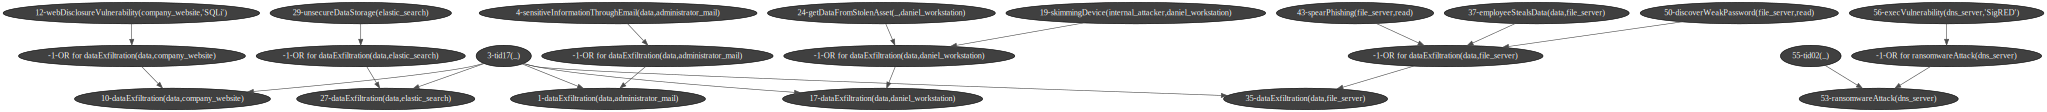

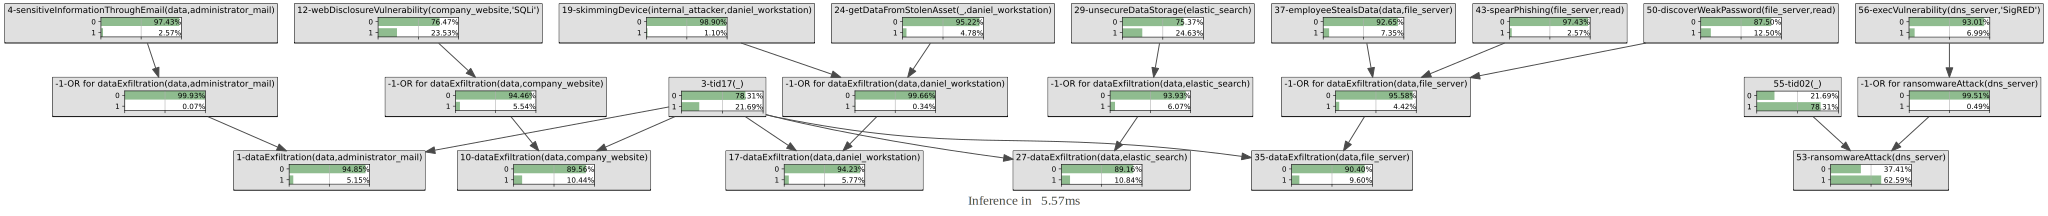

In [70]:
bn = gum.loadBN("filled_btg.bifxml")
gu = GumUtils(bn)
# # gnb.showBN(bn, size=20)
# bn = gu.diag
gnb.showBN(bn, size=60)
# gnb.showInference(bn, size = 30)

#gnb.showCPTs(bn)
gnb.showInference(bn, size=60)
# goal_nodes = gu.get_leaf_nodes()

# p("Make inference")
# ie=gum.LazyPropagation(bn)
# ie.makeInference()
# for l in goal_nodes:
#     print(ie.posterior(l.name))
# # print (ie.posterior("w"))





## Impact risk functions testP

In [4]:
lfrom variables import * 
from risk import *


assets = AssetImpact.from_csv()
i = "53-ransomwareAttack(dns_server)"
a = AssetImpact.get_from_goal(assets, i)
print(a.get_security_incident_loss())

402097.11829732073


In [8]:
data = {'Country': ['Belgium',  'India',  'Brazil'],

'Capital': ['Brussels',  'New Delhi',  'Brasilia'],

'Population': [11190846, 1303171035, 207847528]} 

df = pd.DataFrame(data,columns=['Country',  'Capital',  'Population'])
i = df.loc[df['Capital'] == 'Brussels']
# print(df['Population']['Brussels'])




NameError: name 'pd' is not defined

## Test sc import and threat benefit reduction

In [71]:
secs = SecurityControl.from_json(folder_data('json_sc.json'))
scm = SecurityControlManager(secs)
for s in secs:
    print(s.name)

threats = Threat.from_csv(folder_data(TID_FILE))
for t in threats:
    threat_benefits = SecurityControl.get_threat_benefits(secs, t)
    t.apply_threat_benefits(threat_benefits)
"""
    print("{} is addressed by :".format(t.tid))
    for tb in threat_benefits: 
        print(tb.sc)
"""



CIS_04
CIS_05
CIS_06
CIS_07
CIS_09
CIS_10
CIS_12
CIS_14
CIS_16
OTH_01
OTH_02
OTH_03
OTH_04
tid17
CIS_04
CIS_05
CIS_06
CIS_07
CIS_09
CIS_10
CIS_12
CIS_14
CIS_16
OTH_01
OTH_02
OTH_03
OTH_04
[+] Apply threat reduction for tid17
[]
tid02
CIS_04
CIS_05
CIS_06
CIS_07
CIS_09
CIS_10
CIS_12
CIS_14
CIS_16
OTH_01
OTH_02
OTH_03
OTH_04
[+] Apply threat reduction for tid02
[+] Apply prob reduction of 0.3
[+] Old prob: 0.783088 New: 0.23492639999999998
[+] Reduced probability: 0.23492639999999998
tid01
CIS_04
CIS_05
CIS_06
CIS_07
CIS_09
CIS_10
CIS_12
CIS_14
CIS_16
OTH_01
OTH_02
OTH_03
OTH_04
[+] Apply threat reduction for tid01
[<model.SecThreatBenefit object at 0x14eb6cf40>, <model.SecThreatBenefit object at 0x14eb6cd00>]
[+] Apply prob reduction of 0.3
[+] Old prob: 0.246324 New: 0.0738972
[+] Apply prob reduction of 0.3
[+] Old prob: 0.0738972 New: 0.022169159999999997
[+] Reduced probability: 0.022169159999999997
tid03
CIS_04
CIS_05
CIS_06
CIS_07
CIS_09
CIS_10
CIS_12
CIS_14
CIS_16
OTH_01
OTH_02
O

'\n    print("{} is addressed by :".format(t.tid))\n    for tb in threat_benefits: \n        print(tb.sc)\n'

## Dispositions

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
